### Частина 1
​
В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [ ]:
import tensorflow as tf
from keras import layers
from keras import models

In [ ]:
# Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Нормалізація даних та зміна форми для CNN
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [ ]:
# Створення моделі CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Компіляція моделі
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001)

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Виведення підсумку моделі
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
# Тренування моделі
history = model.fit(train_images, train_labels, batch_size=256, epochs=19, validation_split=0.2)

Epoch 1/19
188/188 [==============================] - 54s 281ms/step - loss: 0.7270 - accuracy: 0.7395 - val_loss: 0.4163 - val_accuracy: 0.8483
Epoch 2/19
188/188 [==============================] - 52s 277ms/step - loss: 0.4492 - accuracy: 0.8417 - val_loss: 0.3625 - val_accuracy: 0.8697
Epoch 3/19
188/188 [==============================] - 51s 274ms/step - loss: 0.3896 - accuracy: 0.8630 - val_loss: 0.3266 - val_accuracy: 0.8793
Epoch 4/19
188/188 [==============================] - 52s 277ms/step - loss: 0.3582 - accuracy: 0.8740 - val_loss: 0.3057 - val_accuracy: 0.8860
Epoch 5/19
188/188 [==============================] - 49s 261ms/step - loss: 0.3319 - accuracy: 0.8816 - val_loss: 0.2918 - val_accuracy: 0.8928
Epoch 6/19
188/188 [==============================] - 52s 275ms/step - loss: 0.3158 - accuracy: 0.8888 - val_loss: 0.2743 - val_accuracy: 0.8988
Epoch 7/19
188/188 [==============================] - 52s 275ms/step - loss: 0.2956 - accuracy: 0.8942 - val_loss: 0.2736 - val_ac

In [ ]:
# Оцінка моделі на тестовому наборі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2422 - accuracy: 0.9149 - 3s/epoch - 9ms/step

Test accuracy: 0.914900004863739


## Висновки по частині 1

CNN показала кращу здатність до узагальнення на тестових даних (accuracy 91,49%) порівняно з повністю з'єднаною моделлю (accuracy 88,83%).

Використання оптимізатора Adam для CNN спростило процес налаштування швидкості навчання, в той час як для повністю з'єднаної мережі використовувався SGD з більш складним налаштуванням експоненційного зниження швидкості навчання.

Значне покращення відбулись після введення швидкості навчання на рівні 0.001

Основні покращення в результатах точності моделі CNN відбулися після збільшення кількості епох до 19 та встановлення розміру batch_size на рівні 256. (до цих змін значення accuracy складало 90,8%)

Згорткова нейронна мережа (CNN) продемонструвала вищу здатність до узагальнення на тестовому наборі даних, досягнувши точності 91.97%, у порівнянні з повністю з'єднаною моделлю, яка показала точність 88.83%.

Простота налаштування процесу навчання з оптимізатором Adam для CNN стала ключовою перевагою, забезпечивши оптимальну швидкість навчання на рівні 0.001 без необхідності складних налаштувань. У контрасті, для повністю з'єднаної моделі було використано оптимізатор SGD, де потрібно було детально налаштовувати експоненційне зниження швидкості навчання, що зробило процес більш складним та менш інтуїтивним.

Значне покращення продуктивності CNN було досягнуто після введення швидкості навчання на рівні 0.001, що дозволило досягти оптимального балансу між швидкістю збіжності та здатністю моделі до узагальнення.

Також основні покращення в точності моделі CNN були зафіксовані після збільшення кількості епох навчання до 19 та встановлення розміру пакету (batch_size) на рівні 256. Ці зміни зумовили підвищення точності з 90.8% до 91.49%.

In [ ]:
class_names = ['Футболка', 'Штани', 'Светр', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Чоботи']

313/313 [==============================] - 4s 14ms/step


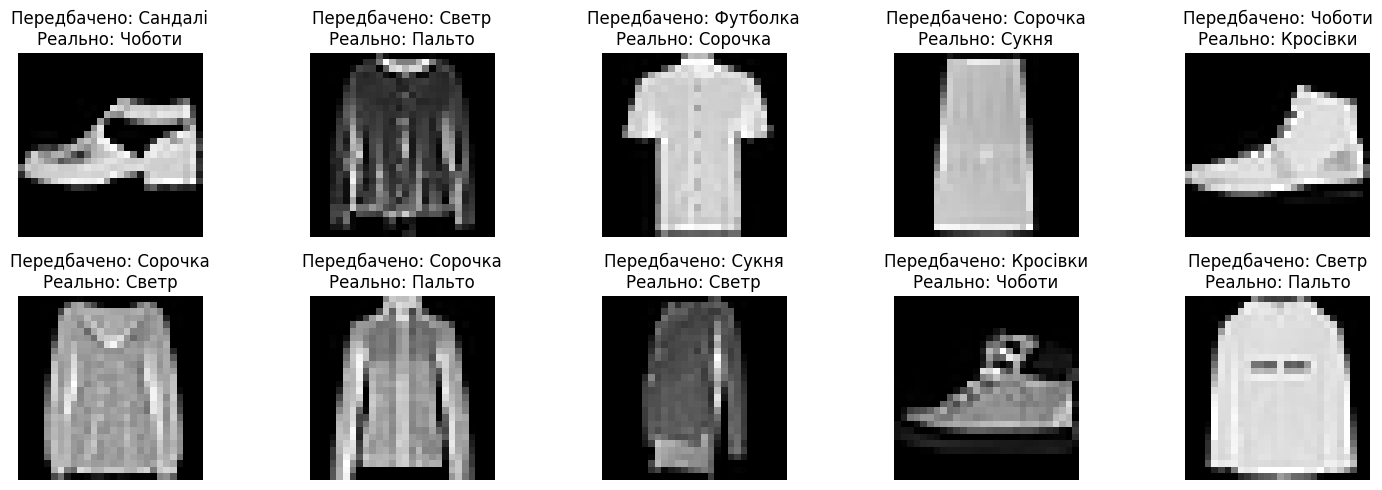

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Здійснення передбачень для всього тестового набору
predictions = model.predict(test_images)

# Визначення індексів, де передбачення не відповідають дійсним міткам
misclassified_indices = np.where(np.argmax(predictions, axis=1) != test_labels)[0]

# Обмеження кількості помилкових передбачень для візуалізації
num_misclassified = min(len(misclassified_indices), 10)  # Візуалізувати до 10 помилкових передбачень
misclassified_images = test_images[misclassified_indices[:num_misclassified]]
misclassified_labels = test_labels[misclassified_indices[:num_misclassified]]
misclassified_predictions = predictions[misclassified_indices[:num_misclassified]]

# Візуалізація помилкових передбачень
plt.figure(figsize=(15, 5))
for i in range(num_misclassified):
    plt.subplot(2, num_misclassified // 2 + num_misclassified % 2, i+1)
    plt.imshow(misclassified_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(misclassified_predictions[i])
    true_label = misclassified_labels[i]
    plt.title(f"Передбачено: {class_names[predicted_label]}\nРеально: {class_names[true_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()